# Packages

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import yahoofinancials
from scipy.optimize import minimize
import seaborn as sn
from scipy.stats import anderson,kstest,shapiro, probplot

# Masalah.  
Misalkan portofolio saham dengan komposisi saham TLKM, BBNI, dan ASII. Akan dicari nilai return dengan variansi minimal dan juga dicari komposisi dari masing-masing saham.  

In [15]:
stock = ['TLKM.JK', 'BBNI.JK','ASII.JK', 'ANTM.JK', 'BMRI.JK','BBRI.JK', 'ARTO.JK', 'UNVR.JK', 'AMRT.JK', 'HRUM.JK',
        'BBCA.JK', 'INCO.JK', 'ADRO.JK', 'PTBA.JK', 'PGAS.JK']
#stock = ['TSLA', 'DIS', 'NKE', 'AAPL']
df = pd.DataFrame(columns=stock)
for i in stock :
    temp = yf.Ticker(i).history(period = '2y', interval = '1mo',actions=False)
    temp.dropna(inplace = True)
    temp['log_return'] = np.log(temp['Close']) - np.log(temp['Close'].shift(1))
    temp['log_return'].dropna(inplace = True)
    df[i] =temp['log_return'].dropna()

In [16]:
mu = df.mean().values
C = df.cov().values
e = np.ones(len(mu))
print(f'Vektor return {mu} dan \n matriks kovariansi \n {C} \n dan vektor e {e}')


Vektor return [ 0.02767517  0.05165774  0.03186793  0.00319869  0.02767793  0.01338323
 -0.04864651  0.00012696  0.02313598  0.06490812  0.01867683  0.038018
  0.08789632  0.05981998  0.03664152] dan 
 matriks kovariansi 
 [[ 1.97230791e-03  1.32166592e-03  8.34386308e-04  1.15856063e-03
   1.15074893e-03  1.09477615e-03  4.93653952e-03 -2.97178169e-03
   1.49353645e-03  4.04423077e-03  1.38068156e-03  9.65485462e-04
   1.97162177e-03  1.28030706e-03  2.42595246e-04]
 [ 1.32166592e-03  9.08263288e-03  4.29283534e-03  2.30981929e-03
   7.05957670e-03  4.44399792e-03  2.81057543e-03 -4.54379736e-04
  -2.11985757e-03 -7.90058378e-03  3.77125086e-03  2.33889158e-03
  -2.32683287e-03 -1.17118606e-03  4.69948925e-03]
 [ 8.34386308e-04  4.29283534e-03  5.18738657e-03  3.67124158e-03
   4.39271765e-03  3.47046258e-03 -3.19103357e-03  2.08106014e-04
   3.39637695e-03 -3.13449440e-03  2.21478179e-03  1.86898224e-03
   1.08585273e-03  8.76748547e-04  2.34910786e-03]
 [ 1.15856063e-03  2.30981929e

In [17]:
# mu = np.array([1.1, 1.2, 1.3])
# C = np.array([[0.01, 0, 0], [0, 0.05, 0], [0, 0, 0.07]])
# e = np.ones(len(mu))
# print(f'Vektor return {mu} dan \n matriks kovariansi \n {C} \n dan vektor e {e}')


Dari masalah 
\begin{equation}
\min\left\{ -t \mu^T \mathbf{x} +  \frac{1}{2}\mathbf{x}^T C  \mathbf{x} | \mathbf{e}^T \mathbf{x} = 1 \right\}
\end{equation}
dengan $t$ adalah suatu parameter tak negatif.  
dapat diperoleh bahwa persamaan untuk efficient frontiernya adalah : 
\begin{equation}
\sigma^2_P - \beta_0 = \frac{(\mu_P - \alpha_0)^2}{\alpha_1}
\end{equation}
dengan :
\begin{align}
\alpha_0 = \mu^T h_0 \\
\alpha_1 = \mu^T h_1 \\
\beta_0 = h_0^TCh_0
\end{align}
dan 
\begin{align}
h_0 &= \frac{C^{-1}e}{e^TC^{-1}e} \\  
h_1 &= C^{-1}\mu - \frac{e^TC^{-1}\mu}{e^TC^{-1}e} C^{-1}e
\end{align}

In [18]:
h_0 = (np.linalg.inv(C).dot(e))/(e.dot(np.linalg.inv(C)).dot(e))
h_1 = np.linalg.inv(C).dot(mu) -((e.dot(np.linalg.inv(C)).dot(mu))/(e.dot(np.linalg.inv(C)).dot(e)))*(np.linalg.inv(C).dot(e))
print(f'Diperoleh \n h_0 {h_0}\n dan \n h_1 {h_1}')

Diperoleh 
 h_0 [ 0.39546611 -1.24194987 -0.14601211  0.18157226  0.76124243 -0.0972968
  0.15284902  0.27522835 -0.1806234  -0.28030511  0.75862022  0.02092897
  0.02121286  0.25903681  0.12003027]
 dan 
 h_1 [-1.79505931e+14  4.36965664e+16  2.00148210e+16 -3.11240239e+15
 -3.83209103e+16  1.26795701e+16  5.17102101e+15  1.30591924e+16
  1.89378228e+15  4.15625063e+15 -1.62900345e+16 -1.38750183e+16
 -8.85432435e+15  1.11544684e+16 -3.11934766e+16]


In [19]:
alpha_0 = mu.dot(h_0)
alpha_1 = mu.dot(h_1)
beta_0 = h_0.dot(C).dot(h_0)
beta_2 = h_1.dot(C).dot(h_1)
print(f'Diperoleh \n alpha_0 : {alpha_0}, \n alpha_1 : {alpha_1}, \n beta_0 : {beta_0}\n beta_2 : {beta_2}')

Diperoleh 
 alpha_0 : -0.03056768088835259, 
 alpha_1 : -32807254113286.625, 
 beta_0 : -4.7330531548916675e-18
 beta_2 : 918848322091189.2


Sehingga persamaan Efficient Frontier - nya menjadi :  
\begin{equation}
\sigma^2_P - 0.00875 = \frac{(\mu_P - 1.125)^2}{0.035}
\end{equation}

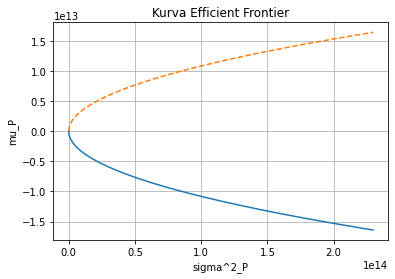

Nilai return dari variansi yang minimum adalah : -16403627056643.344
Dengan masing-masing proporsi saham ['TLKM.JK', 'BBNI.JK', 'ASII.JK', 'ANTM.JK', 'BMRI.JK', 'BBRI.JK', 'ARTO.JK', 'UNVR.JK', 'AMRT.JK', 'HRUM.JK', 'BBCA.JK', 'INCO.JK', 'ADRO.JK', 'PTBA.JK', 'PGAS.JK'] adalah sebagai berikut : {h_0}


In [20]:
t = np.linspace(0,0.5, 1000)
sigma_P = beta_0 + t**2 *beta_2
mu_p = alpha_0 + t*alpha_1
mu_p_bawah = alpha_0 - t*alpha_1
plt.plot(sigma_P, mu_p)
plt.plot(sigma_P, mu_p_bawah, '--')
plt.xlabel('sigma^2_P')
plt.ylabel('mu_P')
plt.grid(True)
plt.title('Kurva Efficient Frontier')
plt.show()
print(f'Nilai return dari variansi yang minimum adalah : {np.min(mu_p)}')
print(f'Dengan masing-masing proporsi saham',stock ,'adalah sebagai berikut : {h_0}')

Misalkan ditambahkan sebuah asset \textit{risk-free} dengan \textit{rate of return} $r = 1.02$. Maka diperoleh capital market linenya sebagai berikut : 

In [21]:
def objective(weights): 
    weights = np.array(weights)
    return weights.dot(C).dot(weights.T)
# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        # This constraints says that the inequalities (ineq) must be non-negative.# The expected daily return of our portfolio and we want to be at greater than 0.002352
        {"type": "ineq", "fun": lambda x: np.sum(mu*x)-0.06}

        )
# Every stock can get any weight from 0 to 1
bounds = tuple((0,1) for x in range(mu.shape[0]))
# Initialize the weights with an even split
# In out case each stock will have 10% at the beginning
guess = [1./mu.shape[0] for x in range(mu.shape[0])]
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
x_ = optimized_results.x

In [22]:
np.sum(np.round(x_,5))

1.0

In [23]:
port_ = dict(zip(stock,np.round(x_,5)))
port = dict()
for (key,value) in port_.items():
    if value >0 : 
        port[key] = value
port

{'BBNI.JK': 0.27961,
 'UNVR.JK': 0.04356,
 'INCO.JK': 0.13001,
 'ADRO.JK': 0.40135,
 'PGAS.JK': 0.14547}

In [24]:
start = 2e7 
budget_ = dict()
for (key,value) in port.items():
    if value >0 : 
        budget_[key] = value*start
budget_

{'BBNI.JK': 5592200.000000001,
 'UNVR.JK': 871200.0,
 'INCO.JK': 2600199.9999999995,
 'ADRO.JK': 8027000.0,
 'PGAS.JK': 2909399.9999999995}

In [25]:
budget = pd.DataFrame.from_dict(data= budget_, orient= 'index').T
budget.rename(index={0: 'Total Spread'}, inplace= True)
budget

,BBNI.JK,UNVR.JK,INCO.JK,ADRO.JK,PGAS.JK
Total Spread,5592200.0,871200.0,2600200.0,8027000.0,2909400.0


In [26]:
expense = pd.DataFrame(columns=port.keys())
for item in port.keys(): 
    temp = yf.Ticker(item).history(period = '1d', interval = '1mo',actions=False)
    expense[item] = temp['Close']*100 #1 lot
expense.rename(index={expense.index[0]: str('Closing ' + str(expense.index[0]).split(' ')[0])}, inplace= True)
expense

,BBNI.JK,UNVR.JK,INCO.JK,ADRO.JK,PGAS.JK
Date,,,,,
Closing 2022-05-17,845000.0,480000.0,727500.0,322000.0,156000.0


In [27]:
qty = pd.concat([expense,budget])
temp_ = pd.DataFrame(np.round(qty.iloc[1] / qty.iloc[0],0)).T
temp_.rename(index={0: 'Total Lot'}, inplace= True)
qty = pd.concat([qty, temp_])
spend = pd.DataFrame(np.round(qty.iloc[2] * qty.iloc[0],0)).T
finale = pd.concat([qty, spend])
finale.rename(index={0: 'Total Spending'}, inplace= True)
finale

,BBNI.JK,UNVR.JK,INCO.JK,ADRO.JK,PGAS.JK
Closing 2022-05-17,845000.0,480000.0,727500.0,322000.0,156000.0
Total Spread,5592200.0,871200.0,2600200.0,8027000.0,2909400.0
Total Lot,7.0,2.0,4.0,25.0,19.0
Total Spending,5915000.0,960000.0,2910000.0,8050000.0,2964000.0


In [28]:
finale.sum(axis = 1)

Closing 2022-05-17     2530500.0
Total Spread          20000000.0
Total Lot                   57.0
Total Spending        20799000.0
dtype: float64

In [29]:
print(f'return :', x_.dot(mu)*100, '%')
print(f'risk :', x_.dot(C).dot(x_)*100, '%')
print(f'Total Money :',finale.sum(axis=1)[-1])
print(f'Total Idle Money :', start - finale.sum(axis=1)[-1])

return : 5.999999999643227 %
risk : 0.3184243245154742 %
Total Money : 20799000.0
Total Idle Money : -799000.0


In [30]:
finale.to_csv(str('IHSG '+finale.index[0].split(' ')[1]+'.csv'))